In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Data Overview

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.head(15)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [6]:
data_attributes = list(df.columns)
print(f"data attributes: {data_attributes}")
print(f"length: {len(data_attributes)}")

data attributes: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']
length: 13


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Data Cleaning Proccess

### Removing Data Outliers

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [35]:
df_cleaned.head(15)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
11,62.0,0,231,0,25,1,253000.00,0.9,140,1,1,10,1
12,45.0,1,981,0,30,0,136000.00,1.1,137,1,0,11,1
13,50.0,1,168,0,38,1,276000.00,1.1,137,1,0,11,1
14,49.0,1,80,0,30,1,427000.00,1.0,138,0,0,12,0


### Data Corelation

In [38]:
correlation_matrix = df_cleaned.corr()
abs(correlation_matrix['DEATH_EVENT']) < 0.001

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
Name: DEATH_EVENT, dtype: bool

In [39]:
correlation_matrix['DEATH_EVENT']

age                         0.282100
anaemia                     0.068454
creatinine_phosphokinase    0.048815
diabetes                   -0.032478
ejection_fraction          -0.305454
high_blood_pressure         0.079622
platelets                  -0.065993
serum_creatinine            0.348548
serum_sodium               -0.112804
sex                         0.037374
smoking                     0.051383
time                       -0.507905
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

creatinine_phosphokinase - [diabetes]

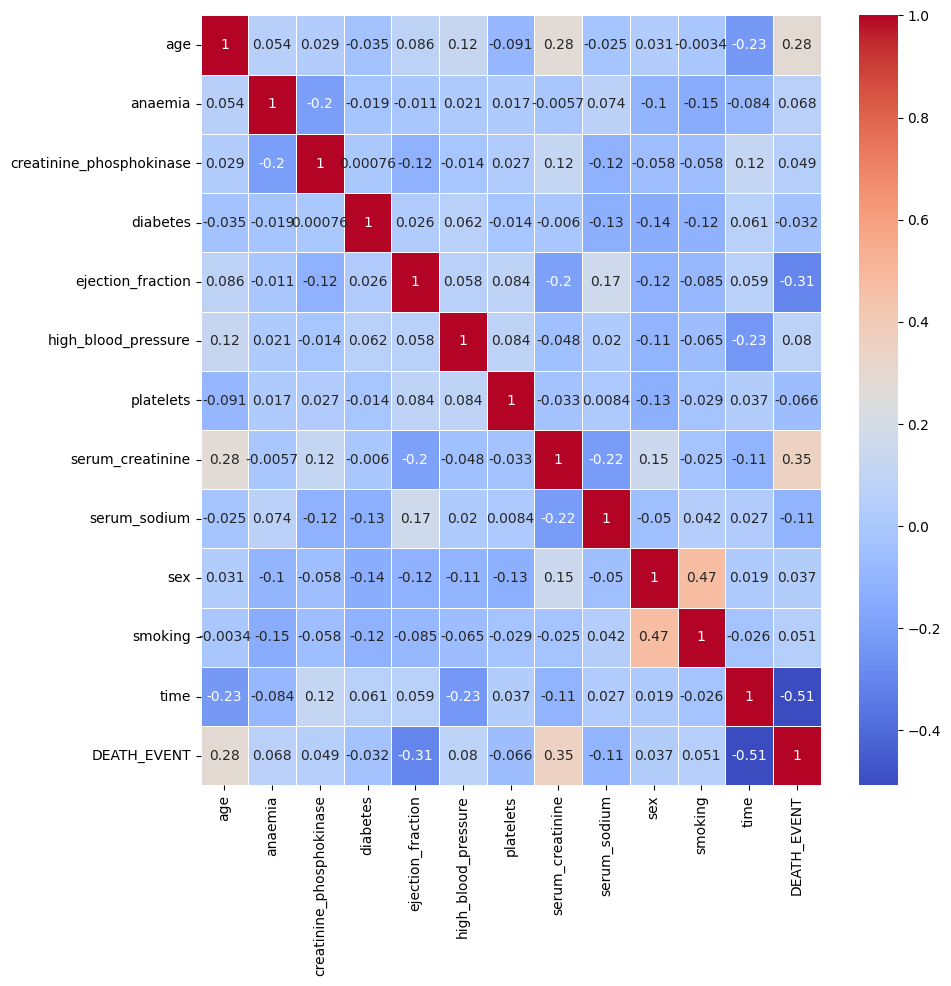

In [27]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    linewidths=0.5
)
plt.show()

### Data Covariance

In [44]:
df_to_covariance = df_cleaned.drop(columns=['DEATH_EVENT'])

In [45]:
covariance_matrix = df_to_covariance.cov()

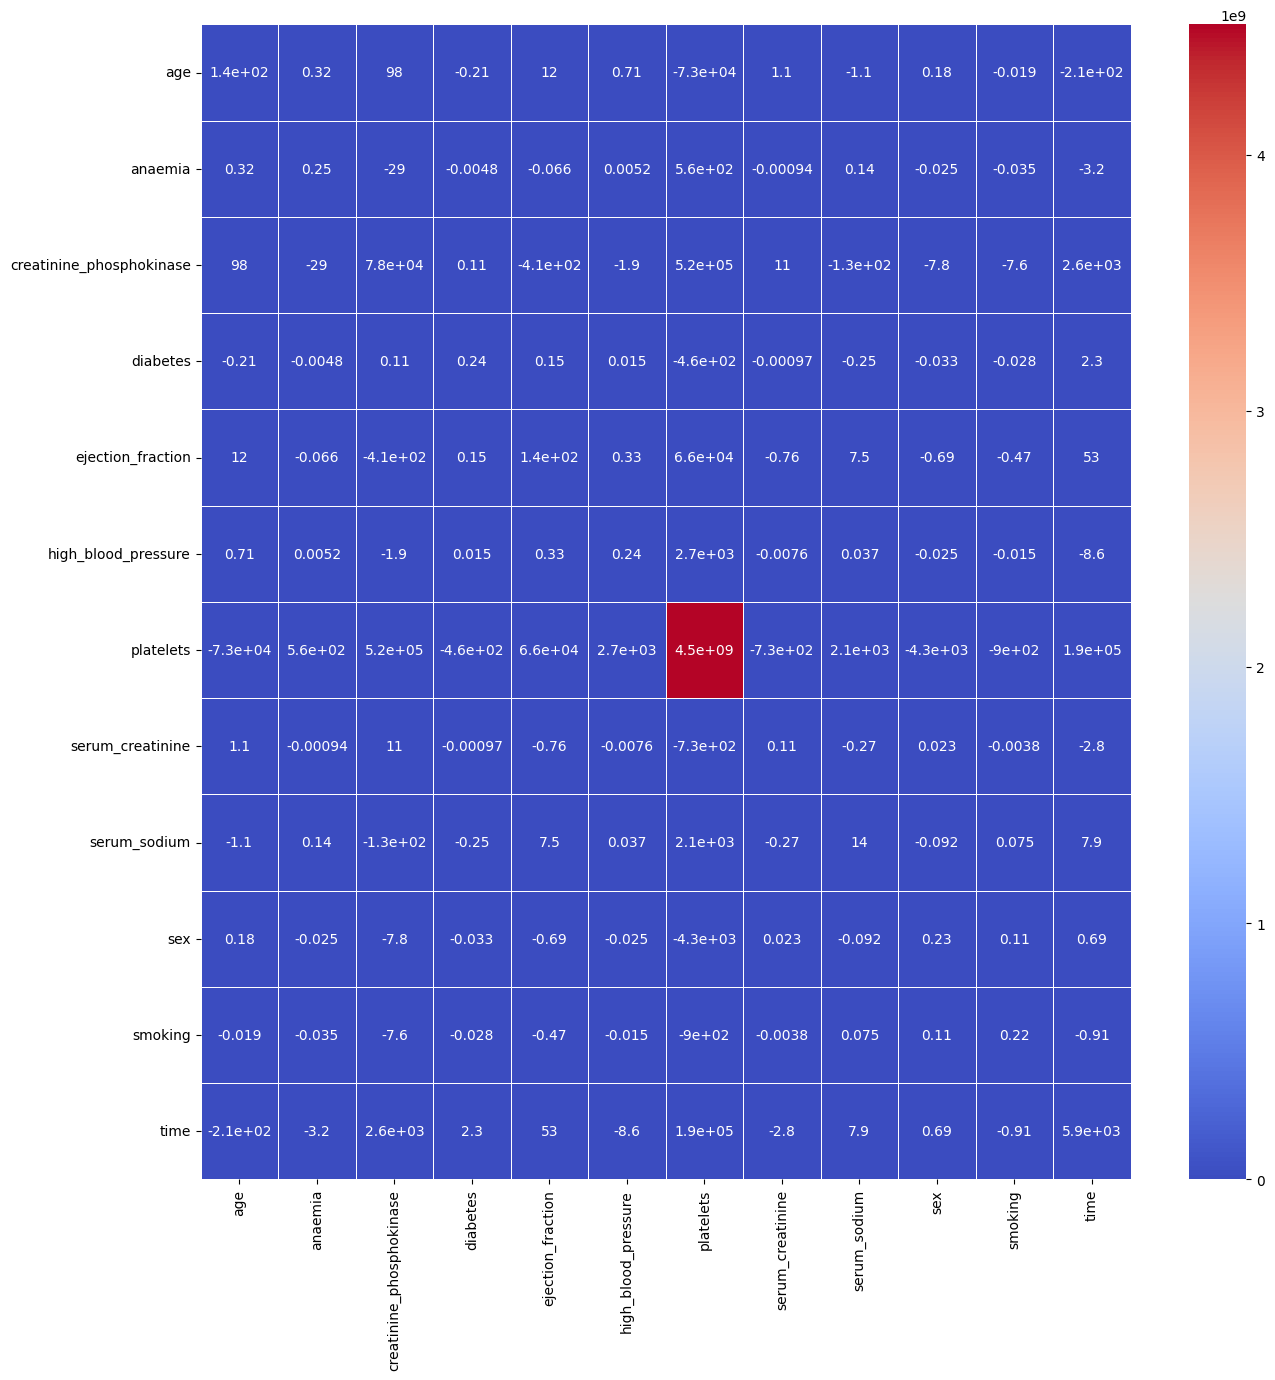

In [46]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    covariance_matrix, 
    annot=True, 
    cmap='coolwarm', 
    linewidths=0.5
)
plt.show()

covariance sangat besar karena skala antar fitur berbeda jauh satu sama lain

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_to_covariance)
df_scaled = pd.DataFrame(df_scaled, columns=df_to_covariance.columns)

covariance_matrix = df_scaled.cov()

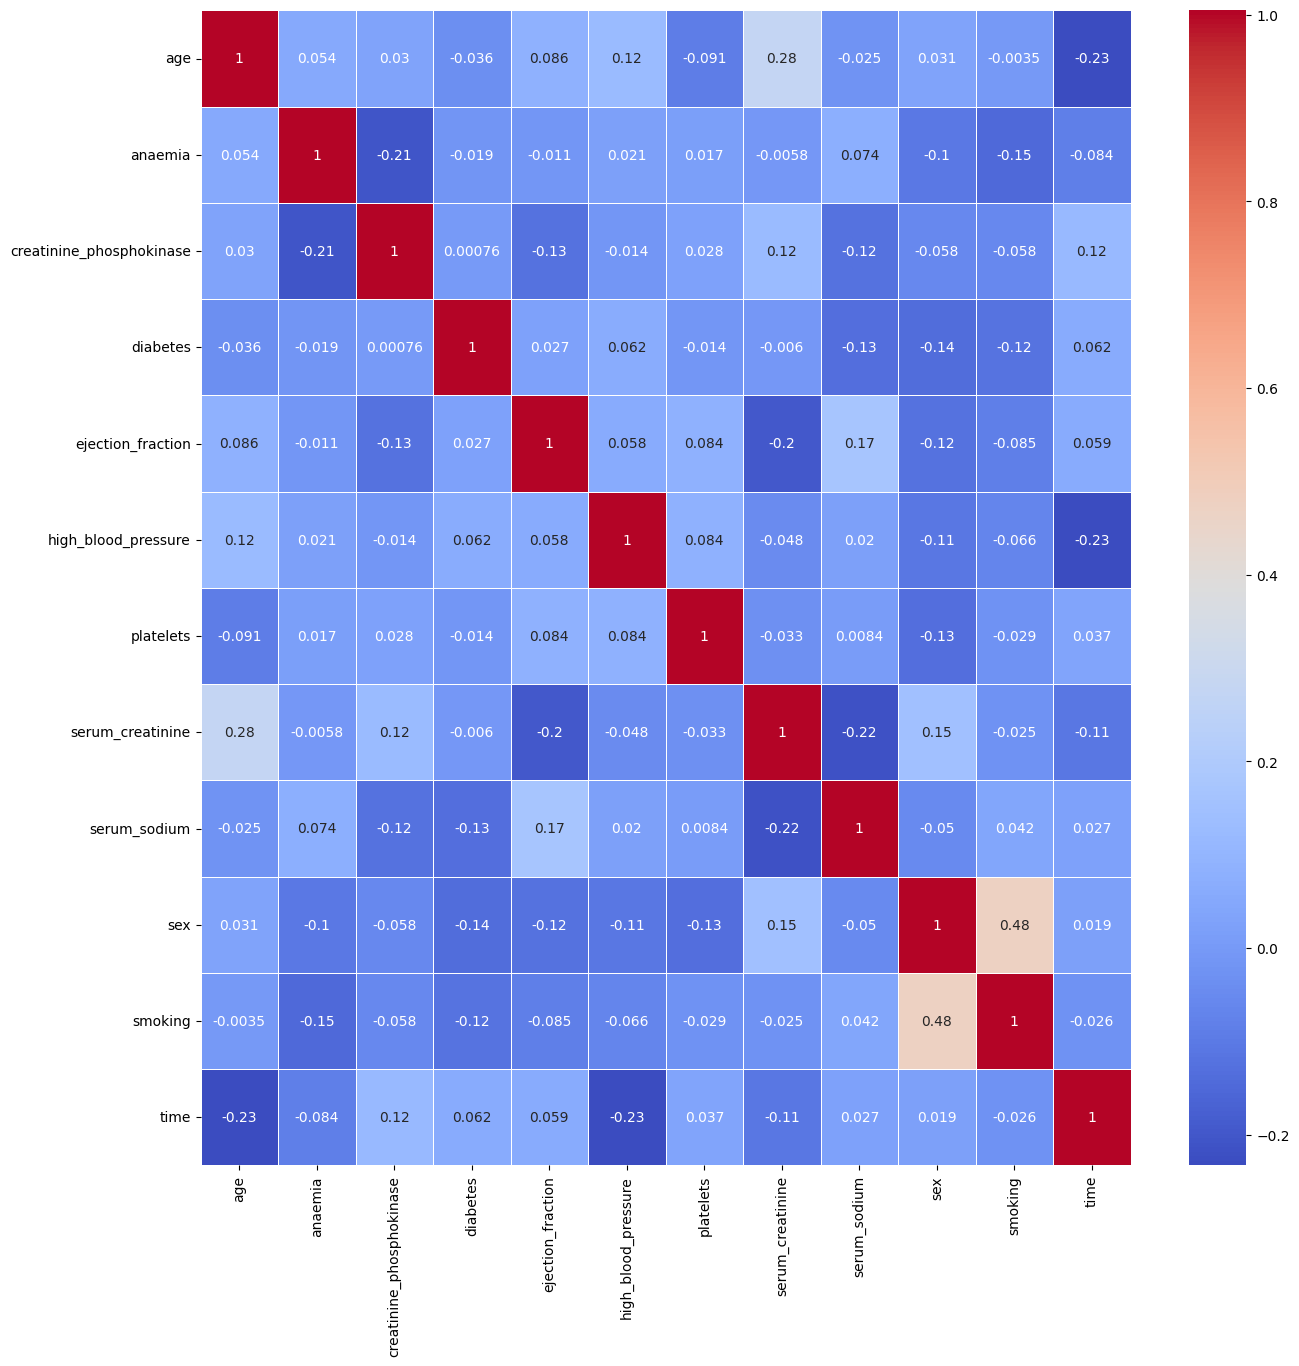

In [51]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    covariance_matrix, 
    annot=True, 
    cmap='coolwarm', 
    linewidths=0.5
)
plt.show()

In [53]:
# PCA Proccess

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
df_scaled_after_PCA = pca.fit_transform(df_scaled)

In [55]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")

Explained variance ratio: [0.14486047 0.12887789 0.12031642 0.09351578 0.08596281 0.08498933
 0.07745796 0.06426138 0.05926712 0.05447617 0.04738806]


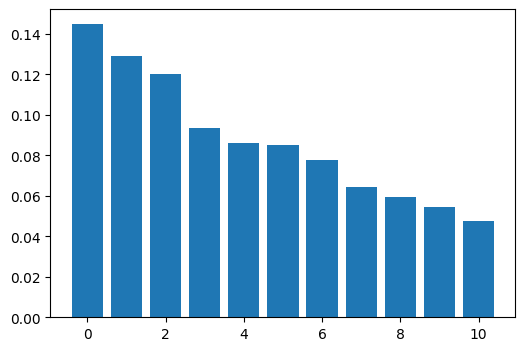

In [56]:
plt.figure(figsize=(6, 4))
plt.bar(range(len(explained_variance)), explained_variance)
plt.show()

In [58]:
newcolumns = [f'PC{i+1}' for i in range(df_scaled_after_PCA.shape[1])]
dataAttributes_after_PCA = pd.DataFrame(df_scaled_after_PCA, columns=newcolumns).to_csv("after_pca.csv", index=False)

## Data Summary

Data yang tadinya memiliki 12 attribute sekarang hanya memiliki 10 attribute karena yang akan digunakan adalah data yang mewakili 95% dari data attribute